In [247]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import m2cgen as m2c
import joblib
import pickle
import glob
import sys
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
print("done")



done


In [248]:
files = glob.glob("clean_csv/*.csv")
print(files)
for file in files:
    print(file.split("\\")[1])

['clean_csv\\in01-bus-window.csv', 'clean_csv\\in02-in-takapuna-library-children.csv', 'clean_csv\\in03-in-takapuna-library-general.csv', 'clean_csv\\in04-classroom.csv', 'clean_csv\\in05-in-building-by-window1150.csv', 'clean_csv\\in06-bright-retail-lighting.csv', 'clean_csv\\out01-cbd-walk.csv', 'clean_csv\\out02-walk-primary.csv', 'clean_csv\\out03-park.csv', 'clean_csv\\out04-tree-shade.csv', 'clean_csv\\out05-walk-primary.csv', 'clean_csv\\out06-out-takapuna-cbd.csv', 'clean_csv\\out07-cbd-walk-1619.csv', 'clean_csv\\out08-cbd-walk-1240.csv', 'clean_csv\\out09-albert-park-1421.csv', 'clean_csv\\out10-cbd-walk-1258.csv', 'clean_csv\\out11-under-clear-ceiling-1308.csv', 'clean_csv\\out12-walk-afterschool.csv', 'clean_csv\\out13-walk-toschool.csv', 'clean_csv\\out14-sunset.csv']
in01-bus-window.csv
in02-in-takapuna-library-children.csv
in03-in-takapuna-library-general.csv
in04-classroom.csv
in05-in-building-by-window1150.csv
in06-bright-retail-lighting.csv
out01-cbd-walk.csv
out02-wa

# Preprocessing



In [249]:
# Import data to use as training data

dataframes_in = []
dataframes_out = []
files = glob.glob("clean_csv/*.csv")
print(files)
for filename in files:
    df = pd.read_csv(filename,  index_col=False)
    print(filename)
    print(filename[10])
    if filename[10] == "i":

        dataframes_in.append(df)
    else:
        dataframes_out.append(df)

in_data = pd.concat(dataframes_in)
out_data = pd.concat(dataframes_out)

# Outdoors is positive
print(in_data.shape)
print(out_data.shape)
in_data["target"] = 0
out_data["target"] = 1

all_data = pd.concat([in_data, out_data])


['clean_csv\\in01-bus-window.csv', 'clean_csv\\in02-in-takapuna-library-children.csv', 'clean_csv\\in03-in-takapuna-library-general.csv', 'clean_csv\\in04-classroom.csv', 'clean_csv\\in05-in-building-by-window1150.csv', 'clean_csv\\in06-bright-retail-lighting.csv', 'clean_csv\\out01-cbd-walk.csv', 'clean_csv\\out02-walk-primary.csv', 'clean_csv\\out03-park.csv', 'clean_csv\\out04-tree-shade.csv', 'clean_csv\\out05-walk-primary.csv', 'clean_csv\\out06-out-takapuna-cbd.csv', 'clean_csv\\out07-cbd-walk-1619.csv', 'clean_csv\\out08-cbd-walk-1240.csv', 'clean_csv\\out09-albert-park-1421.csv', 'clean_csv\\out10-cbd-walk-1258.csv', 'clean_csv\\out11-under-clear-ceiling-1308.csv', 'clean_csv\\out12-walk-afterschool.csv', 'clean_csv\\out13-walk-toschool.csv', 'clean_csv\\out14-sunset.csv']
clean_csv\in01-bus-window.csv
i
clean_csv\in02-in-takapuna-library-children.csv
i
clean_csv\in03-in-takapuna-library-general.csv
i
clean_csv\in04-classroom.csv
i
clean_csv\in05-in-building-by-window1150.csv
i

C:\Users\lucia\AppData\Local\Temp\ipykernel_6168\77827264.py:8: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename,  index_col=False)


In [250]:
all_data.head()
print(all_data.dtypes)

timestamp    float64
uv             int64
accelX         int64
accelY         int64
accelZ         int64
r              int64
g              int64
b              int64
c              int64
colorTemp      int64
lux            int64
target         int64
dtype: object


In [251]:
all_data.fillna(0)

,timestamp,uv,accelX,accelY,accelZ,r,g,b,c,colorTemp,lux,target
0,1.712471e+09,0,-487,1873,6644,127,142,175,356,7404,54,0
1,1.712471e+09,0,-1746,-1469,8748,335,501,464,1319,6668,342,0
2,1.712471e+09,1,-2418,295,8408,67,113,118,298,8101,70,0
3,1.712471e+09,0,-1215,-245,7452,9,11,12,25,7106,5,0
4,1.712471e+09,0,-3068,-286,6818,31,37,39,78,6993,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54,1.716417e+09,2,-1635,-723,7138,85,113,158,313,9546,35,1
55,1.716417e+09,0,492,-1277,6000,109,146,200,401,9429,48,1
56,1.716417e+09,3,-203,-1319,6765,100,133,182,364,9366,44,1
57,1.716417e+09,0,1097,-3503,9336,116,151,205,407,9237,50,1


In [252]:
print(all_data["target"].value_counts())


print(all_data.isnull().sum())

target
1    2974
0    1672
Name: count, dtype: int64
timestamp    0
uv           0
accelX       0
accelY       0
accelZ       0
r            0
g            0
b            0
c            0
colorTemp    0
lux          0
target       0
dtype: int64


In [253]:
print(all_data[all_data["uv"] < 0])

Empty DataFrame
Columns: [timestamp, uv, accelX, accelY, accelZ, r, g, b, c, colorTemp, lux, target]
Index: []


# Create new features

In [254]:
import math
# # accelerometer

all_data['accelN'] = all_data.apply(lambda row: (row.accelX + row.accelY + row.accelZ) / 3, axis=1)
all_data['accelMagnitude'] = all_data.apply(lambda row: row.accelX ** 2 + row.accelY ** 2 + row.accelZ ** 2, axis=1)
all_data['accelXY'] = all_data.apply(lambda row: abs(row.accelX * row.accelY), axis=1)


# # rgb vs clear
all_data['red/clear'] = all_data.apply(lambda row: row.r / (row.c + 1), axis=1)
all_data['green/clear'] = all_data.apply(lambda row: row.g /  (row.c + 1), axis=1)
all_data['blue/clear'] = all_data.apply(lambda row: row.b /  (row.c + 1), axis=1)

# # rgb versus each other
all_data['red/green'] = all_data.apply(lambda row: row.r / (row.g + 1), axis=1)
all_data['blue/red'] = all_data.apply(lambda row: row.b / (row.r + 1), axis=1)
all_data['blue/green'] = all_data.apply(lambda row: row.b / (row.g + 1), axis=1)

# relative difference of each colour compared to rgbc channels
all_data["(clear-red)/red"] = all_data.apply(lambda row: (row.c - row.r) / (row.r + 1), axis=1)
all_data["(clear-green)/red"] = all_data.apply(lambda row: (row.c - row.g) / (row.r + 1), axis=1)
all_data["(clear-blue)/red"] = all_data.apply(lambda row: (row.c - row.b) / (row.r + 1), axis=1)

all_data["(clear-red)/green"] = all_data.apply(lambda row: (row.c - row.r) / (row.g + 1), axis=1)
all_data["(clear-green)/green"] = all_data.apply(lambda row: (row.c - row.g) / (row.g + 1), axis=1)
all_data["(clear-blue)/green"] = all_data.apply(lambda row: (row.c - row.b) / (row.g + 1), axis=1)

all_data["(clear-red)/blue"] = all_data.apply(lambda row: (row.c - row.r) / (row.b + 1), axis=1)
all_data["(clear-green)/blue"] = all_data.apply(lambda row: (row.c - row.g) / (row.b + 1), axis=1)
all_data["(clear-blue)/blue"] = all_data.apply(lambda row: (row.c - row.b) / (row.b + 1), axis=1)

all_data["(clear-red)/clear"] = all_data.apply(lambda row: (row.c - row.r) / (row.c + 1), axis=1)
all_data["(clear-green)/clear"] = all_data.apply(lambda row: (row.c - row.g) / (row.c + 1), axis=1)
all_data["(clear-blue)/clear"] = all_data.apply(lambda row: (row.c - row.b) / (row.c + 1), axis=1)

# Okay until log

# log(rgb) vs log(clear)
all_data['log(red)/log(clear)'] = all_data.apply(lambda row: math.log(row.r + 1)/ math.log(row.c + 1), axis=1)
all_data['log(green)/log(clear)'] = all_data.apply(lambda row: math.log(row.g + 1) / math.log(row.c + 1), axis=1)
all_data['log(blue)/log(clear)'] = all_data.apply(lambda row: math.log(row.b + 1) / math.log(row.c + 1), axis=1)



#log(rgb) versus each other
all_data['log(red)/log(green)'] = all_data.apply(lambda row: math.log(row.r + 1) / math.log(row.g + 1), axis=1)
all_data['log(blue)/log(red)'] = all_data.apply(lambda row: math.log(row.b + 1) / math.log(row.r + 1), axis=1)
all_data['log(blue)/log(green)'] = all_data.apply(lambda row: math.log(row.b + 1) / math.log(row.g + 1), axis=1)

# sqrt(rgb) vs sqrt(clear)
all_data['sqrt(red)/sqrt(clear)'] = all_data.apply(lambda row: math.sqrt(row.r + 1)/ math.sqrt(row.c + 1), axis=1)
all_data['sqrt(green)/sqrt(clear)'] = all_data.apply(lambda row: math.sqrt(row.g + 1) / math.sqrt(row.c + 1), axis=1)
all_data['sqrt(blue)/sqrt(clear)'] = all_data.apply(lambda row: math.sqrt(row.b + 1) / math.sqrt(row.c + 1), axis=1)

#sqrt(rgb) vs each other
all_data['sqrt(red)/sqrt(green)'] = all_data.apply(lambda row: math.sqrt(row.r + 1) / math.sqrt(row.g + 1), axis=1)
all_data['sqrt(blue)/sqrt(red)'] = all_data.apply(lambda row: math.sqrt(row.b + 1) / math.sqrt(row.r + 1), axis=1)
all_data['sqrt(blue)/sqrt(green)'] = all_data.apply(lambda row: math.sqrt(row.b + 1) / math.sqrt(row.g + 1), axis=1)


# # uv vs lux
all_data['lux/uv'] = all_data.apply(lambda row: row.lux / (row.uv + 1), axis=1) 
all_data['blue/uv'] = all_data.apply(lambda row: row.b / (row.uv + 1), axis=1) 
all_data['(clear - blue)/uv'] = all_data.apply(lambda row: (row.c - row.b) / (row.uv + 1), axis=1)
all_data['log(lux)/log(uv)'] = all_data.apply(lambda row:  math.log(row.lux + 1)/ math.log(row.uv + 2), axis=1)
all_data['log(blue)/log(uv)'] = all_data.apply(lambda row:  math.log(row.b + 1)/ math.log(row.uv + 2), axis=1)
all_data['sqrt(lux)/sqrt(uv)'] = all_data.apply(lambda row:  math.sqrt(row.lux + 1)/ math.sqrt(row.uv + 1), axis=1)
all_data['sqrt(blue)/sqrt(uv)'] = all_data.apply(lambda row:  math.sqrt(row.b + 1)/ math.sqrt(row.uv + 1), axis=1)


X_train = all_data.drop(['timestamp', 'target'], axis=1).copy()
y_train = all_data['target'].copy()
column_names = list(X_train.columns)
print(column_names)

['uv', 'accelX', 'accelY', 'accelZ', 'r', 'g', 'b', 'c', 'colorTemp', 'lux', 'accelN', 'accelMagnitude', 'accelXY', 'red/clear', 'green/clear', 'blue/clear', 'red/green', 'blue/red', 'blue/green', '(clear-red)/red', '(clear-green)/red', '(clear-blue)/red', '(clear-red)/green', '(clear-green)/green', '(clear-blue)/green', '(clear-red)/blue', '(clear-green)/blue', '(clear-blue)/blue', '(clear-red)/clear', '(clear-green)/clear', '(clear-blue)/clear', 'log(red)/log(clear)', 'log(green)/log(clear)', 'log(blue)/log(clear)', 'log(red)/log(green)', 'log(blue)/log(red)', 'log(blue)/log(green)', 'sqrt(red)/sqrt(clear)', 'sqrt(green)/sqrt(clear)', 'sqrt(blue)/sqrt(clear)', 'sqrt(red)/sqrt(green)', 'sqrt(blue)/sqrt(red)', 'sqrt(blue)/sqrt(green)', 'lux/uv', 'blue/uv', '(clear - blue)/uv', 'log(lux)/log(uv)', 'log(blue)/log(uv)', 'sqrt(lux)/sqrt(uv)', 'sqrt(blue)/sqrt(uv)']


In [255]:
# print(all_data.isnull().sum())
# print(all_data.isinf().sum())
print(np.isinf(all_data).values.sum())


0


In [256]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 512, test_size=0)
# column_names = list(X_train.columns)
# print(X_train.head())
# print(column_names)

# Useful functions and values for final evaluation

In [257]:
# #initializing useful lists
# accuracies = {"Test": {}, "Train": {}}
# precisions = {"Test": {}, "Train": {}}
# recall = {"Test": {}, "Train": {}}
# f_score = {"Test": {}, "Train": {}}

# def set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name):
#     test_precision, test_recall, test_f_score, _ = precision_recall_fscore_support(y_test, test_predictions)
#     train_precision, train_recall, train_f_score, _ = precision_recall_fscore_support(y_train, train_predictions)


#     print(name, 1 - test_precision, 1 - test_recall, 1 - test_f_score)
#     print(name, 1 - train_precision, 1 - train_recall, 1 - train_f_score)

#     precisions["Test"][name] = test_precision
#     precisions["Train"][name] = train_precision

#     recall["Test"][name] = test_recall
#     recall["Train"][name] = train_recall

#     f_score["Test"][name] = test_f_score
#     f_score["Train"][name] = train_f_score

# def set_accuracies(name, train_accuracy, test_accuracy):
#     accuracies["Train"][name] = train_accuracy
#     accuracies["Test"][name] = test_accuracy


In [258]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [259]:
nlb_test = LGBMClassifier()
nlb_test.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2974, number of negative: 1672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12732
[LightGBM] [Info] Number of data points in the train set: 4646, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640121 -> initscore=0.575887
[LightGBM] [Info] Start training from score 0.575887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

# Classifiers

In [260]:
print(X_train.shape)
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(X_train, y_train)

(4646, 50)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [261]:


xgboost_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
    'gamma': [0, 0.01, 0.1],
    'alpha': [0, 0.01, 0.1]
}


xgb_model = XGBClassifier(random_state = 42, missing = float('inf'))
xgb_grid_search = GridSearchCV(xgb_model, xgboost_param_grid, scoring='roc_auc', cv=5)
xgb_grid_search.fit(X_train, y_train) 

Best set of hyperparameters:  {'alpha': 0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1}
Best score:  0.9368388441638326


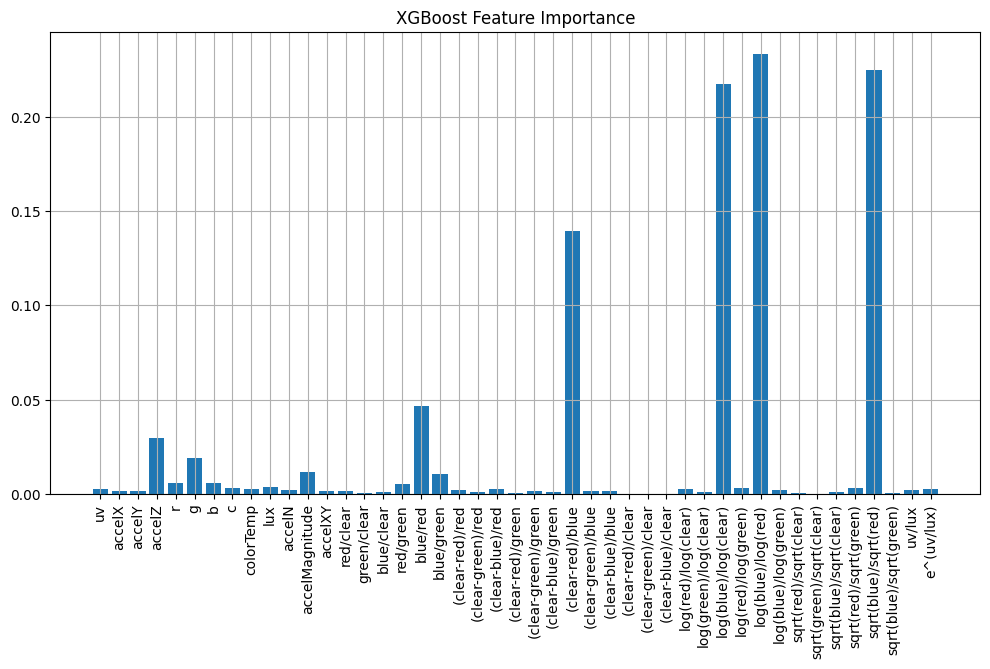

(clear-red)/blue: 0.139
log(blue)/log(clear): 0.218
log(blue)/log(red): 0.234
sqrt(blue)/sqrt(red): 0.225


In [42]:

print("Best set of hyperparameters: ", xgb_grid_search.best_params_)
print("Best score: ", xgb_grid_search.best_score_)

feature_importances = xgb_grid_search.best_estimator_.feature_importances_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.title("XGBoost Feature Importance")
plt.grid()
plt.show()

for feature, importance in zip(column_names, feature_importances):
    if importance > 0.05:
        print(f"{feature}: {importance:.3f}")

# Try 1 Best set of hyperparameters:  {'alpha': 0, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1}
#Best score:  0.9432572726759139

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier



adaboost_model = AdaBoostClassifier(DecisionTreeClassifier())

adb_param_grid = {'estimator__max_depth':[2, 4],
              'estimator__min_samples_leaf':[10, 20],
              'n_estimators':[10,50,100],
              }

adaboost_grid_search = GridSearchCV(adaboost_model, adb_param_grid, scoring='roc_auc', cv=5)
adaboost_grid_search.fit(X_train, y_train) 

c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:521: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:521: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\lucia\AppData\Local\P

ValueError: Input X contains infinity or a value too large for dtype('float32').

Best set of hyperparameters:  {'estimator__max_depth': 4, 'estimator__min_samples_leaf': 10, 'n_estimators': 50}
Best score:  0.9432191522259492


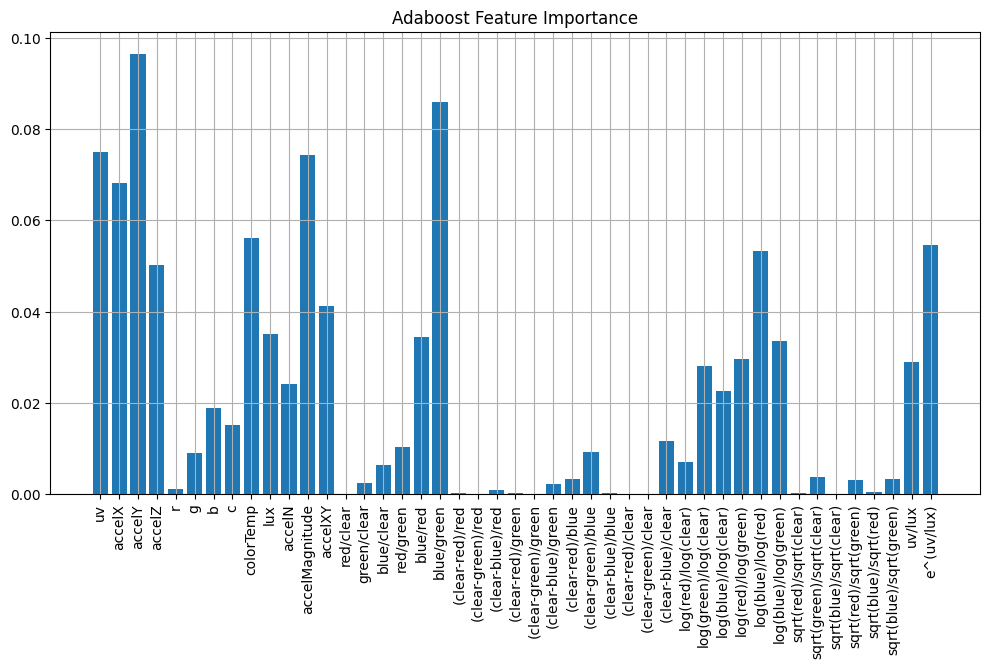

uv: 0.075
accelX: 0.068
accelY: 0.097
accelZ: 0.050
g: 0.009
b: 0.019
c: 0.015
colorTemp: 0.056
lux: 0.035
accelN: 0.024
accelMagnitude: 0.074
accelXY: 0.041
green/clear: 0.002
blue/clear: 0.006
red/green: 0.010
blue/red: 0.034
blue/green: 0.086
(clear-blue)/green: 0.002
(clear-red)/blue: 0.003
(clear-green)/blue: 0.009
(clear-blue)/clear: 0.012
log(red)/log(clear): 0.007
log(green)/log(clear): 0.028
log(blue)/log(clear): 0.023
log(red)/log(green): 0.030
log(blue)/log(red): 0.053
log(blue)/log(green): 0.034
sqrt(green)/sqrt(clear): 0.004
sqrt(red)/sqrt(green): 0.003
sqrt(blue)/sqrt(green): 0.003
uv/lux: 0.029
e^(uv/lux): 0.055


In [26]:

print("Best set of hyperparameters: ", adaboost_grid_search.best_params_)
print("Best score: ", adaboost_grid_search.best_score_)

feature_importances = adaboost_grid_search.best_estimator_.feature_importances_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.title("Adaboost Feature Importance")
plt.grid()
plt.show()

for feature, importance in zip(column_names, feature_importances):
    if importance > 0.002:
        print(f"{feature}: {importance:.3f}")



In [14]:
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 300]
}


rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid,scoring='roc_auc', cv=5)

rf_grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 300]},
             scoring='roc_auc')

Best set of hyperparameters:  {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.9529329287684438


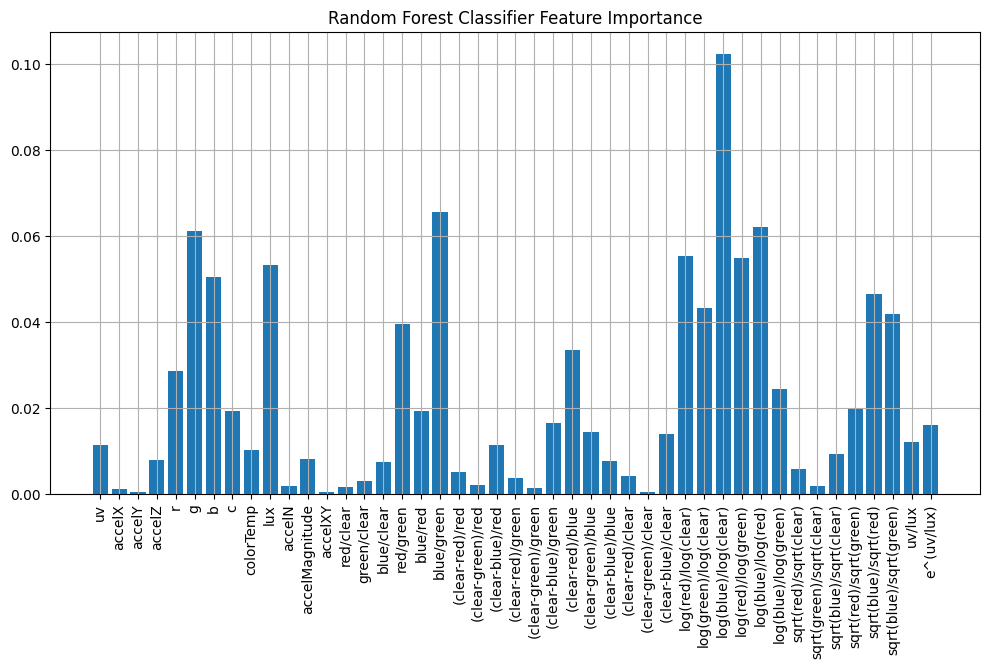

r: 0.029
g: 0.061
b: 0.050
lux: 0.053
red/green: 0.039
blue/green: 0.066
(clear-red)/blue: 0.033
log(red)/log(clear): 0.055
log(green)/log(clear): 0.043
log(blue)/log(clear): 0.102
log(red)/log(green): 0.055
log(blue)/log(red): 0.062
log(blue)/log(green): 0.024
sqrt(blue)/sqrt(red): 0.046
sqrt(blue)/sqrt(green): 0.042


In [17]:

print("Best set of hyperparameters: ", rf_grid_search.best_params_)
print("Best score: ", rf_grid_search.best_score_)

feature_importances = rf_grid_search.best_estimator_.feature_importances_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.title("Random Forest Classifier Feature Importance")
plt.grid()
plt.show()

for feature, importance in zip(column_names, feature_importances):
    if importance > 0.03:
        print(f"{feature}: {importance:.3f}")



In [30]:


nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

nb_scores = cross_val_score(nb_model, X_train, y_train, cv = 5, scoring = 'roc_auc')
nb_cv_avg = np.mean(nb_scores)

print("Best score: ", nb_cv_avg)

Best score:  0.5556499501300725


In [7]:
# SVM Linear
from sklearn.svm import SVC

svm_param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01],} 

svm_model = SVC(kernel='linear')
svm_grid_linear = GridSearchCV(svm_model, svm_param_grid, cv = 5, refit = True)
svm_grid_linear.fit(X_train, y_train)



In [ ]:

print("Best set of hyperparameters: ", svm_grid_linear.best_params_)
print("Best score: ", svm_grid_linear.best_score_)

feature_importances = svm_grid_linear.best_estimator_.coef_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.title("Linear Feature Importance")
plt.grid()
plt.show()


In [ ]:
# SVM RBF
from sklearn.svm import SVC

svm_param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01]} 

svm_model = SVC(kernel='rbf')
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv = 5, refit = True)
svm_grid.fit(X_train, y_train)


print("Best set of hyperparameters: ", svm_param_grid.best_params_)
print("Best score: ", svm_param_grid.best_score_)

feature_importances = xgb_grid_search.best_estimator_.coef_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
# SVM Poly
from sklearn.svm import SVC

svm_param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01], 
              'kernel': ['rbf', "linear", "poly"]} 

svm_model = SVC(kernel='poly')
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv = 5, refit = True)
svm_grid.fit(X_train, y_train)


print("Best set of hyperparameters: ", svm_param_grid.best_params_)
print("Best score: ", svm_param_grid.best_score_)

feature_importances = xgb_grid_search.best_estimator_.coef_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [23]:
# SVM RBF with removing features
from sklearn.svm import SVC
X_train_reduced = X_train[["red/green", "(clear-red)/blue", "log(blue)/log(clear)", "log(red)/log(green)", "log(blue)/log(green)"]]
svm_param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01]} 

svm_model = SVC(kernel='rbf')
svm_grid_reduction = GridSearchCV(svm_model, svm_param_grid, cv = 5, refit = True)
svm_grid_reduction.fit(X_train_reduced, y_train)




GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01]})

In [24]:

print("Best set of hyperparameters: ", svm_grid_reduction.best_params_)
print("Best score: ", svm_grid_reduction.best_score_)

# feature_importances = svm_grid_reduction.best_estimator_.coef_

# fig = plt.figure(figsize=(12,6))
# plt.bar(column_names, feature_importances)
# plt.xticks(rotation=90)
# plt.title("RBF SVM Feature Importance")
# plt.grid()
# plt.show()

Best set of hyperparameters:  {'C': 100, 'gamma': 10}
Best score:  0.9330352532147149


In [30]:
# SVM RBF with removing features
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
X_train_reduced_02 = X_train[["r", "g" , "b", "lux", "red/green", "blue/green","(clear-red)/blue", "log(red)/log(clear)", "log(green)/log(clear)", "log(blue)/log(clear)", "log(red)/log(green)", "log(blue)/log(red)","log(blue)/log(green)", "sqrt(blue)/sqrt(red)", "sqrt(blue)/sqrt(green)"]]
svm_param_grid_02 = {'C': [ 0.1, 1, 10, 50],  
              'gamma': [0.0001, 0.00001]} 

svm_model = SVC(kernel='rbf')
svm_grid_reduction_02 = GridSearchCV(svm_model, svm_param_grid_02, cv = 5, refit = True)
svm_grid_reduction_02.fit(X_train_reduced_02, y_train)




GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': [0.0001, 1e-05]})

In [31]:

print("Best set of hyperparameters: ", svm_grid_reduction_02.best_params_)
print("Best score: ", svm_grid_reduction_02.best_score_)

# feature_importances = svm_grid_reduction.best_estimator_.coef_

# fig = plt.figure(figsize=(12,6))
# plt.bar(column_names, feature_importances)
# plt.xticks(rotation=90)
# plt.title("RBF SVM Feature Importance")
# plt.grid()
# plt.show()

Best set of hyperparameters:  {'C': 10, 'gamma': 0.0001}
Best score:  0.9045259094511338


In [33]:
# SVM RBF with removing features
from sklearn.svm import SVC
rf_threshold_03 = ["g", "b", "lux", "red/green",  "blue/green", "(clear-red)/blue", "log(red)/log(clear)", "log(green)/log(clear)", "log(blue)/log(clear)", "log(red)/log(green)",  "log(blue)/log(red)","sqrt(blue)/sqrt(red)", "sqrt(blue)/sqrt(green)"]
X_train_reduced = X_train[["g", "b", "lux", "red/green",  "blue/green", "(clear-red)/blue", "log(red)/log(clear)", "log(green)/log(clear)", "log(blue)/log(clear)", "log(red)/log(green)",  "log(blue)/log(red)","sqrt(blue)/sqrt(red)", "sqrt(blue)/sqrt(green)"]]
svm_param_grid_03 = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01]} 

svm_model = SVC(kernel='rbf')
svm_grid_reduction = GridSearchCV(svm_model, svm_param_grid_03, cv = 5, refit = True)
svm_grid_reduction.fit(X_train_reduced, y_train)




GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01]})

In [35]:

print("Best set of hyperparameters: ", svm_grid_reduction.best_params_)
print("Best score: ", svm_grid_reduction.best_score_)

# feature_importances = svm_grid_reduction.best_estimator_.coef_

# fig = plt.figure(figsize=(12,6))
# plt.bar(column_names, feature_importances)
# plt.xticks(rotation=90)
# plt.title("RBF SVM Feature Importance")
# plt.grid()
# plt.show()

Best set of hyperparameters:  {'C': 10, 'gamma': 0.01}
Best score:  0.8920924406268375


In [3]:
#'boosting_type': 'dart', 'min_data_in_leaf': 400, 'num_leaves': 31, 'reg_alpha': 0.1}
lgbm_param_grid = {
    'num_leaves': [31, 80,  127],
    'reg_alpha': [0, 0.05, 0.1, 0.5],
    'reg_lambda': [0, 0.05, 0.1, 0.5],
    'min_data_in_leaf': [ 300, 400, 500, 1000],
    "boosting_type": ['gbdt', 'dart'],

    }

lgb_model = LGBMClassifier(random_state = 42)
lgb_grid_search = GridSearchCV(lgb_model, lgbm_param_grid, scoring='roc_auc', cv=5)
lgb_grid_search.fit(X_train, y_train) 

NameError: name 'LGBMClassifier' is not defined

In [2]:

print("Best set of hyperparameters: ", lgb_grid_search.best_params_)
print("Best score: ", lgb_grid_search.best_score_)

feature_importances = lgb_grid_search.best_estimator_.feature_importances_

fig = plt.figure(figsize=(12,6))
plt.bar(column_names, feature_importances)
plt.xticks(rotation=90)
plt.title("LightGBM Feature Importance")
plt.grid()
plt.show()

for feature, importance in zip(column_names, feature_importances):
    if importance > 0.002:
        print(f"{feature}: {importance:.3f}")

NameError: name 'lgb_grid_search' is not defined

In [ ]:

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc',categorical_feature=indexes_of_categories)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=train, y=y)

Model pickling


In [19]:
# Adaboost
adaboost_final = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_leaf=10), n_estimators=50)
adaboost_final.fit(X_train, y_train)


c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    min_samples_leaf=10))

In [20]:
rf_final = RandomForestClassifier(bootstrap=True, max_depth=80, max_features='sqrt', min_samples_leaf=3, min_samples_split=10, n_estimators=100)
rf_final.fit(X_train, y_train)


RandomForestClassifier(max_depth=80, min_samples_leaf=3, min_samples_split=10)

In [ ]:
lgb_final = LGBMClassifier(random_state = 42, boosting_type="dart", reg_alpha=0.05, min_child_samples=400, num_leaves=31, reg )
lgb_grid_search = GridSearchCV(lgb_model, lgb

In [ ]:
dart_model = []

# naive_bayes_dart = m2c.export_to_dart(naive_bayes)
# random_forest_dart = m2c.export_to_dart(random_forest)
# xgbClassifier_dart = m2c.export_to_dart(xgbClassifier)
# adaboost_dart = m2c.export_to_dart(adaboost)

# with open('random_forest.dart', 'w') as f:
#     code = m2c.export_to_dart(random_forest)
#     f.write(code)
# with open('xgboost.dart', 'w') as f:
#     code = m2c.export_to_dart(xgbClassifier)
#     f.write(code)
# with open('xgboost.py', 'w') as f:
#     code = m2c.export_to_python(xgbClassifier)
#     f.write(code)
# with open('decision_tree.dart', 'w') as f:
#     code = m2c.export_to_dart(dTree)
#     f.write(code)
# import pickle



# with open('xgboost.pkl', 'wb') as file:

#     pickle.dump(xgbClassifier, file )



joblib.dump(xgbClassifier, "xgboost_model.pkl")

## ROC Curve

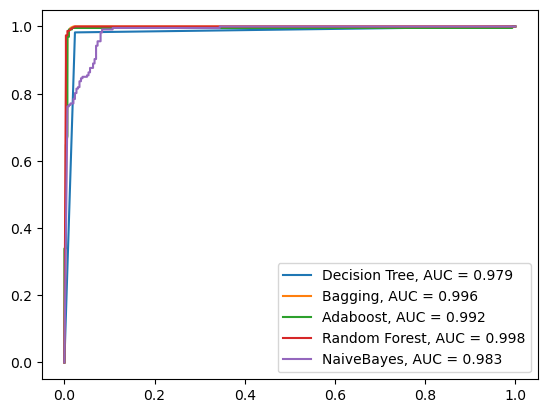

In [14]:
plt.figure(0).clf()

classifiers = {
    "Decision Tree": dTree,
    # "XGBoost": xgbClassifier,
    "Bagging": bagging,
    "Adaboost": adaboost,
    "Random Forest": random_forest,
    "NaiveBayes": naive_bayes
}

for name, classifier in classifiers.items():
    y_pred_probs = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label = f"{name}, AUC = {auc:.3f}")


plt.legend()

In [12]:
# m2cgen

dart_model = []

# naive_bayes_dart = m2c.export_to_dart(naive_bayes)
# random_forest_dart = m2c.export_to_dart(random_forest)
# xgbClassifier_dart = m2c.export_to_dart(xgbClassifier)
# adaboost_dart = m2c.export_to_dart(adaboost)

# with open('random_forest.dart', 'w') as f:
#     code = m2c.export_to_dart(random_forest)
#     f.write(code)
# with open('xgboost.dart', 'w') as f:
#     code = m2c.export_to_dart(xgbClassifier)
#     f.write(code)
# with open('xgboost.py', 'w') as f:
#     code = m2c.export_to_python(xgbClassifier)
#     f.write(code)
# with open('decision_tree.dart', 'w') as f:
#     code = m2c.export_to_dart(dTree)
#     f.write(code)
# import pickle



# with open('xgboost.pkl', 'wb') as file:

#     pickle.dump(xgbClassifier, file )



joblib.dump(xgbClassifier, "xgboost_model.pkl")

['xgboost_model.pkl']

In [13]:
# joblib.dump(x_train.columns, 'column_order.txt')